
# Fourier Filter Example

This script illustrates using geocat-comp's [`fourier_filter`] (https://geocat-comp.readthedocs.io/en/latest/user_api/generated/geocat.comp.fourier_filters.fourier_filter.html) function for xxx different input values: xxx.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

import geocat.comp as gc
import geocat.datafiles as gdf

## Read in data

Open a netCDF data file using xarray default engine and load the data into xarrays. In this example we're using the [`CO-OPS_9415020_wl.csv` file](https://github.com/NCAR/geocat-datafiles/tree/main/ascii_files) from [`geocat-datafiles`](https://github.com/NCAR/geocat-datafiles) package.

In [7]:
dataset = xr.DataArray(pd.read_csv(
    gdf.get("ascii_files/CO-OPS_9415020_wl.csv")))
xr_data = dataset.loc[:, 'Verified (ft)']

Let's take a look at the raw data.

In [8]:
xr_data

<xarray.DataArray (dim_0: 7440)>
array([0.33, 0.22, 0.14, ..., 2.8, 2.62, 2.47], dtype=object)
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 5 6 ... 7433 7434 7435 7436 7437 7438 7439
    dim_1    <U13 'Verified (ft)'

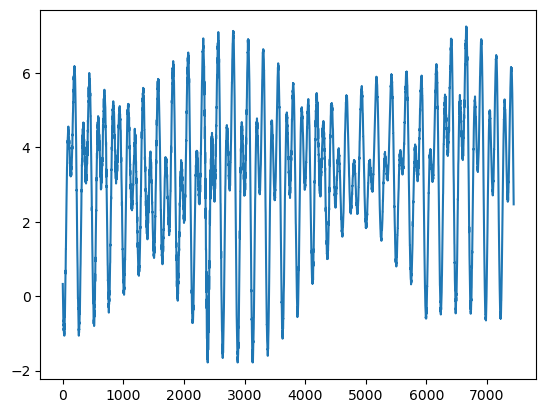

In [23]:
plt.plot(xr_data);

## Calculate Fourier Filter

We will calculate the fourier transform of our data by providing a data frequency and low/high cut off frequencies.

In [19]:
# Set points per hour
data_freq = 10

# Set tide cycle and frequency resolution
tide_freq = 1 / (1 * 12.4206)
res = data_freq / (len(xr_data))

# Define cutoff_frequency_low and cutoff_frequency_high based on tide frequency
cflow = tide_freq - res * 5
cfhigh = tide_freq + res * 5

filter = gc.fourier_filter(xr_data,
                         data_freq,
                         cutoff_frequency_low=cflow,
                         cutoff_frequency_high=cfhigh,
                         band_block=True)

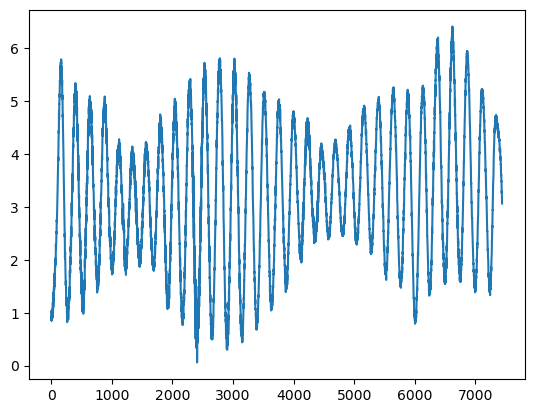

In [20]:
plt.plot(filter);